In [1]:
import numpy as np
import math
from statistics import *
import sympy as sp
from sympy import *

from scipy import stats

In [2]:
# Question 1

theta = Symbol('theta')
alpha = Symbol('alpha')
beta = Symbol('beta')
k = Symbol('k')
n = Symbol('n')

# i)
display('Likelihood', (factorial(4) / (factorial(4) * factorial(4))) * theta**12 * (1 - theta)**(20-12))

# 11)
display('Posterior',theta**(12+5-1) * (1-theta)**(20-12+5-1) )


'Likelihood'

theta**12*(1 - theta)**8/24

'Posterior'

theta**16*(1 - theta)**12

In [3]:
def proposal(lambda_p):
    return np.random.uniform((lambda_p - 1) , (lambda_p + 1))

def Gamma(x, a=4, b=2):
    return (b**a * x**(a-1) * np.exp(-b*x)) / math.gamma(a)
    x = (b**a * x**(a-1) * np.exp(-b*x)) / math.gamma(b)
#     if x < 0 or not x.is_real:
#         return 0
#     else:
    return x

def Poi(x, _lambda):
    return (np.exp(-_lambda) * _lambda**x) / math.factorial(x)

def accept_reject(j, state):
    
    alpha = 4
    beta = 2

    proposed_state = proposal(state)
#     print(f"proposed_state: {proposed_state}")
    
    aceptance_probability = min(1, (Gamma(proposed_state, alpha, beta) / Gamma(state, alpha, beta) ) )
    if (aceptance_probability) < 0:
        aceptance_probability = 0
#     print(f"aceptance_probability: {aceptance_probability}")

    accaptance = np.random.uniform(0,1)
    
#     print(f"x_{j} = state: {state} | proposed_state: {proposed_state} | aceptance_probability: {aceptance_probability} | accept: {aceptance_probability > accaptance }")

    if aceptance_probability > accaptance:
        state = proposed_state
    return state


state = 0.5
states = []
is_accepted = []
N = 10000
BURN_IN_PERIOD = 2000
for j in range(N):
    previous_state = state
    state = accept_reject(j, state)
    if previous_state != state:
        is_accepted.append(True)
    else:
        is_accepted.append(False)
        
    states.append(state)
#     print(f"x_{j} = {state}")

# print(f"x_{N} = {state}")
print(f"Estimated mean = {mean(states[BURN_IN_PERIOD:])}")
# states

Estimated mean = 1.9315845052675262


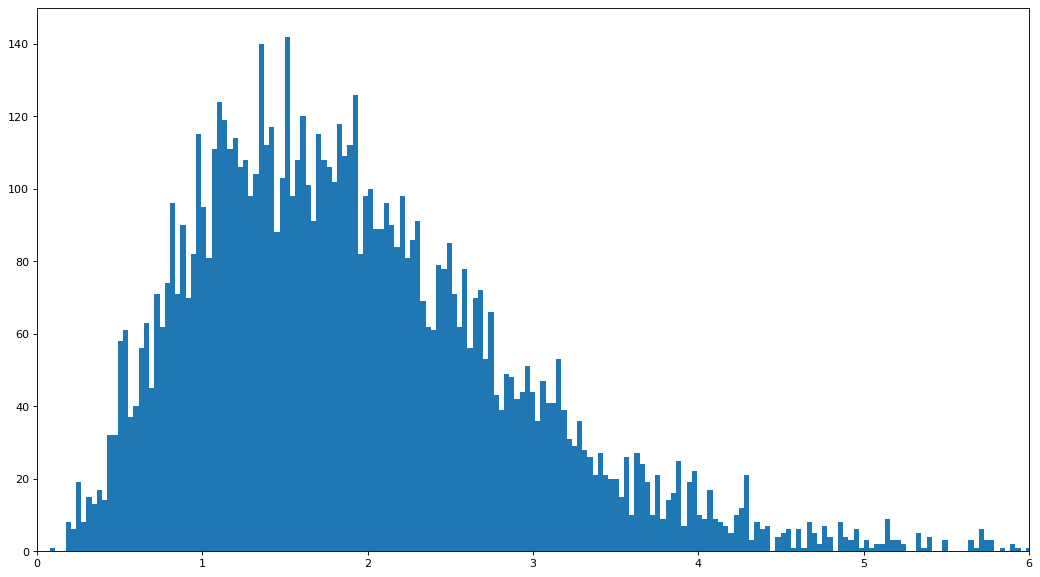

In [4]:
import matplotlib.pyplot as plt   
from matplotlib.pyplot import *
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 9), dpi=80)
n_bins = 200
x = states[BURN_IN_PERIOD:]

plt.hist(x, bins=n_bins)
plt.ylim(0, 150)
plt.xlim(0, 6)
plt.show() 

In [5]:
def accept_reject(j, state):
    
    a = 4
    b = 2

    n = [1/4,1/2,1,1/6,1/6,1/5]
    
    alpha = len(n) + a
    beta = sum(n) + b

    proposed_state = proposal(state)
#     print(f"proposed_state: {proposed_state}")
    
    aceptance_probability = min(1, (Gamma(proposed_state, alpha, beta) / Gamma(state, alpha, beta) ) )
    if (aceptance_probability) < 0:
        aceptance_probability = 0
#     print(f"aceptance_probability: {aceptance_probability}")

    accaptance = np.random.uniform(0,1)
    
#     print(f"x_{j} = state: {state} | proposed_state: {proposed_state} | aceptance_probability: {aceptance_probability} | accept: {aceptance_probability > accaptance }")

    if aceptance_probability > accaptance:
        state = proposed_state
    return state



state = 0.5
states = []
is_accepted = []
N = 10000
BURN_IN_PERIOD = 2000
for j in range(N):
    previous_state = state
    state = accept_reject(j, state)
    if previous_state != state:
        is_accepted.append(True)
    else:
        is_accepted.append(False)
        
    states.append(state)
#     print(f"x_{j} = {state}")

# print(f"x_{N} = {state}")
print(f"Estimated mean = {mean(states[BURN_IN_PERIOD:])}")
# states

Estimated mean = 2.310324920426641


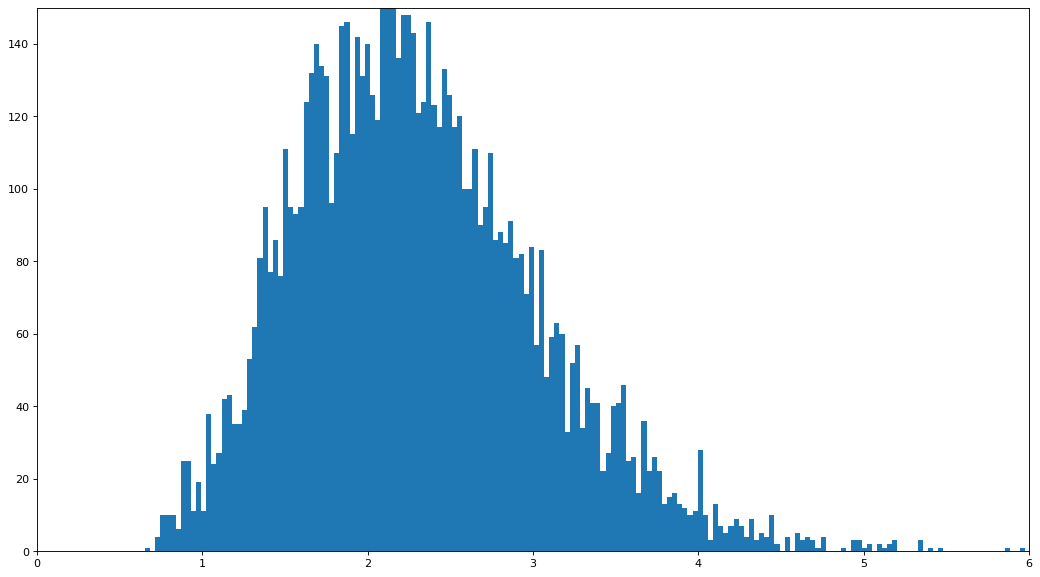

In [6]:
figure(figsize=(16, 9), dpi=80)
n_bins = 200
x = states[BURN_IN_PERIOD:]

plt.hist(x, bins=n_bins)
plt.ylim(0, 150)
plt.xlim(0, 6)
plt.show() 

In [7]:
def accept_reject(j, state):
    
    a = 4
    b = 2

    n = [1/4,1/2,1,1/6,1/6,1/5,0,1/4,1/3,1/5,1/3,1/10,1/3,1/5,1/2,1/2,1/11,1/4,1/4,1/5,1/7,1,1/2,1/2]
    
    alpha = len(n) + a
    beta = sum(n) + b

    proposed_state = proposal(state)
#     print(f"proposed_state: {proposed_state}")
    
    aceptance_probability = min(1, (Gamma(proposed_state, alpha, beta) / Gamma(state, alpha, beta) ) )
    if (aceptance_probability) < 0:
        aceptance_probability = 0
#     print(f"aceptance_probability: {aceptance_probability}")

    accaptance = np.random.uniform(0,1)
    
#     print(f"x_{j} = state: {state} | proposed_state: {proposed_state} | aceptance_probability: {aceptance_probability} | accept: {aceptance_probability > accaptance }")

    if aceptance_probability > accaptance:
        state = proposed_state
    return state



state = 0.5
states = []
is_accepted = []
N = 10000
BURN_IN_PERIOD = 2000
for j in range(N):
    previous_state = state
    state = accept_reject(j, state)
    if previous_state != state:
        is_accepted.append(True)
    else:
        is_accepted.append(False)
        
    states.append(state)
#     print(f"x_{j} = {state}")

# print(f"x_{N} = {state}")
print(f"Estimated mean = {mean(states[BURN_IN_PERIOD:])}")
# states

Estimated mean = 2.7807599342585045


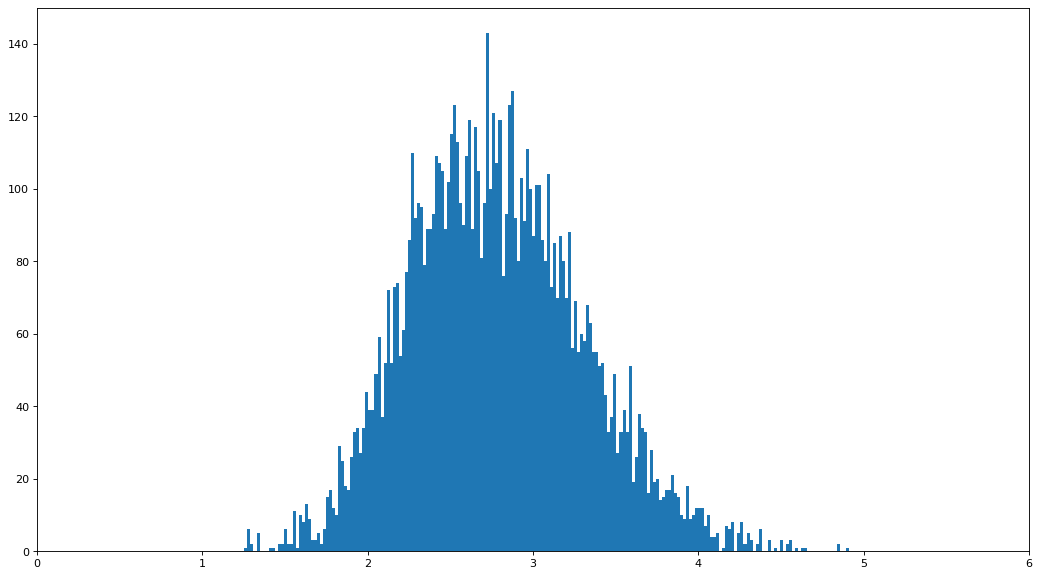

In [8]:
figure(figsize=(16, 9), dpi=80)
n_bins = 200
x = states[BURN_IN_PERIOD:]

plt.hist(x, bins=n_bins)
plt.ylim(0, 150)
plt.xlim(0, 6)
plt.show() 

As more data is received the expected lambda value is increasing because the average time between arrivals is longer than the prior belief of the value of lambda. 

As more data is received the varance is decreasing indicating the value of what is believed to be lambda is approaching true value of lambda.

In [9]:
# Question 3

i)<br />
H<sub>0</sub>: The coin is fair and the probability the coin lands Heads is 0.5 <br />
H<sub>A</sub>: The coin is not fair and the probability the coin lands Heads <0.5

ii)<br />
Number of Heads ~ Bin(N,p)<br />
where N = number of trials and p = probability of landing Heads

In [10]:
def coin_flip(p=0.5):
    if np.random.uniform(0,1) < p:
#         'Heads'
        return 1
    else:
#         'Tails'
        return 0

# n = number of simulations
# N = number of trials, i.e how many times the coin was flipped
# p = probability of landing heads
def run_simulation(n, N, p):
    observations = []
    for _ in range(n):
        observation = []
        for i in range(N):
            observation.append(coin_flip(p))
        observations.append(sum(observation))
    return observations


In [11]:
# iii)
significants_level = 0.05
n = 25000 # number of simulations
N = 10 # number of flips per simulation
p = 0.5 # probability of landing heads

observations = run_simulation(n, N, p)
# observations

critical_value = int(np.percentile(observations, 5))

print(f"iii) The estimated critical value at {significants_level} significants level is: {critical_value}")

# iv)
n = 25000 # number of simulations
N = 10 # number of flips per simulation
p = 0.45 # probability of landing heads

observations = run_simulation(n, N, p)

count = 0
for o in observations:
    if o < critical_value:
        count += 1

statistical_power = count / n

# print(f"critical_value: {critical_value} | count: {count} / N: {n} = {statistical_power}")

print(f"iv) Estimated power of the significants test is: {statistical_power}")

iii) The estimated critical value at 0.05 significants level is: 2
iv) Estimated power of the significants test is: 0.02256


In [12]:
# v)

# Note: this takes a while, to run quicker reduce the value of n

print('v)')
N_s = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

n = 25000 # number of simulations
p = 0.45 # probability of landing Heads

statistical_powers = []

for N in N_s:
    fair_observations = run_simulation(n, N, 0.5)
    observations = run_simulation(n, N, p)
    critical_value = int(np.percentile(fair_observations, 5))
#     critical_value = int(np.percentile(observations, 5))

    count = 0
    for o in observations:
        if o < critical_value:
            count += 1

    statistical_power = count / n
    statistical_powers.append(statistical_power)

    print(f"For N = {N}, the estimated power of the significants test is: {statistical_power}")

v)
For N = 10, the estimated power of the significants test is: 0.024
For N = 20, the estimated power of the significants test is: 0.05328
For N = 50, the estimated power of the significants test is: 0.12972
For N = 100, the estimated power of the significants test is: 0.24008
For N = 200, the estimated power of the significants test is: 0.3574
For N = 500, the estimated power of the significants test is: 0.68936
For N = 1000, the estimated power of the significants test is: 0.93088
For N = 2000, the estimated power of the significants test is: 0.99692
For N = 5000, the estimated power of the significants test is: 1.0


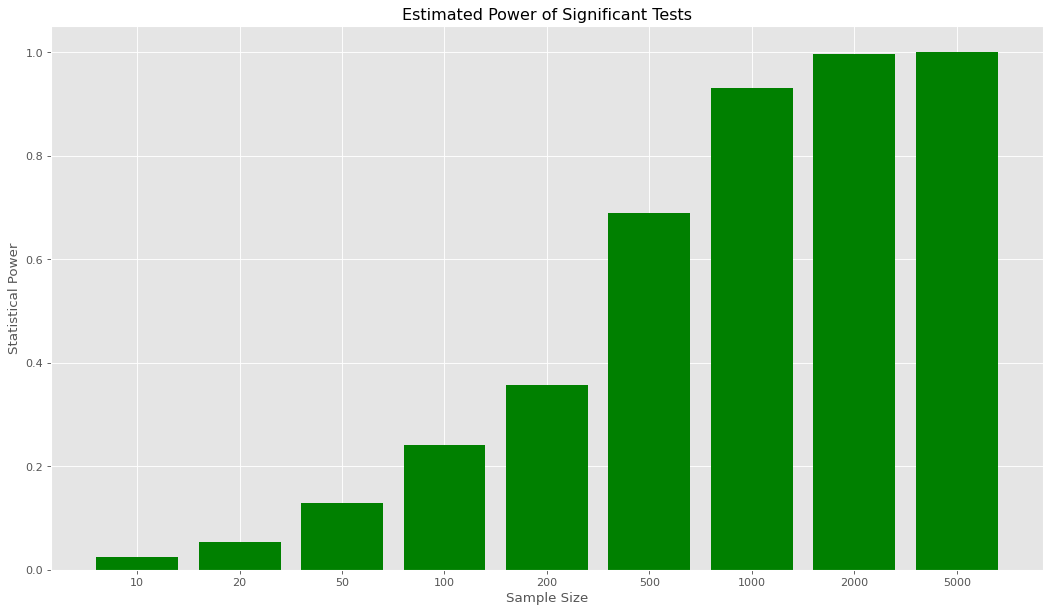

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = N_s
x_pos = [i for i, _ in enumerate(x)]

y = statistical_powers

figure(figsize=(16, 9), dpi=80)

plt.bar(x_pos, y, color='green')
plt.xlabel("Sample Size")
plt.ylabel("Statistical Power")
plt.title("Estimated Power of Significant Tests")

plt.xticks(x_pos, x)

plt.show()

In [14]:
n = 250 #00 # number of simulations
p = 0.45 # probability of landing Heads
statistical_power = 0
N = 200
min_sample_size = N
required_statistical_power = 0.6

while statistical_power < required_statistical_power:
    N += 5
    fair_observations = run_simulation(n, N, 0.5)
    observations = run_simulation(n, N, p)
    critical_value = int(np.percentile(fair_observations, 5))

    count = 0
    for o in observations:
        if o < critical_value:
            count += 1

    statistical_power = count / n
    min_sample_size = N

print(f"vi) For a an estimated statistical power of at least {required_statistical_power} a minimum sample size of: {min_sample_size} is required.")


vi) For a an estimated statistical power of at least 0.6 a minimum sample size of: 330 is required.


In [15]:
print('vii)')
p_s = [0.1, 0.2, 0.3, 0.4, 0.45, 0.55, 0.6, 0.7, 0.8, 0.9] # probabilities
N = 50 # number of trials
n = 25000 # number of simulations

statistical_powers = []
true_proportions = []

fair_observations = run_simulation(n, N, 0.5)
critical_value = int(np.percentile(fair_observations, 5))

for p in p_s:
#     print(p)
    observations = run_simulation(n, N, p)

    count = 0
    for o in observations:
        if o < critical_value:
            count += 1

    statistical_power = count / n
    statistical_powers.append(statistical_power)
    true_proportions.append(sum(observations) / (n * N))

    print(f"For N = {N}, p = {p}, the estimated power of the significants test is: {statistical_power}")

vii)
For N = 50, p = 0.1, the estimated power of the significants test is: 1.0
For N = 50, p = 0.2, the estimated power of the significants test is: 0.99744
For N = 50, p = 0.3, the estimated power of the significants test is: 0.85732
For N = 50, p = 0.4, the estimated power of the significants test is: 0.33328
For N = 50, p = 0.45, the estimated power of the significants test is: 0.12592
For N = 50, p = 0.55, the estimated power of the significants test is: 0.00512
For N = 50, p = 0.6, the estimated power of the significants test is: 0.00024
For N = 50, p = 0.7, the estimated power of the significants test is: 0.0
For N = 50, p = 0.8, the estimated power of the significants test is: 0.0
For N = 50, p = 0.9, the estimated power of the significants test is: 0.0


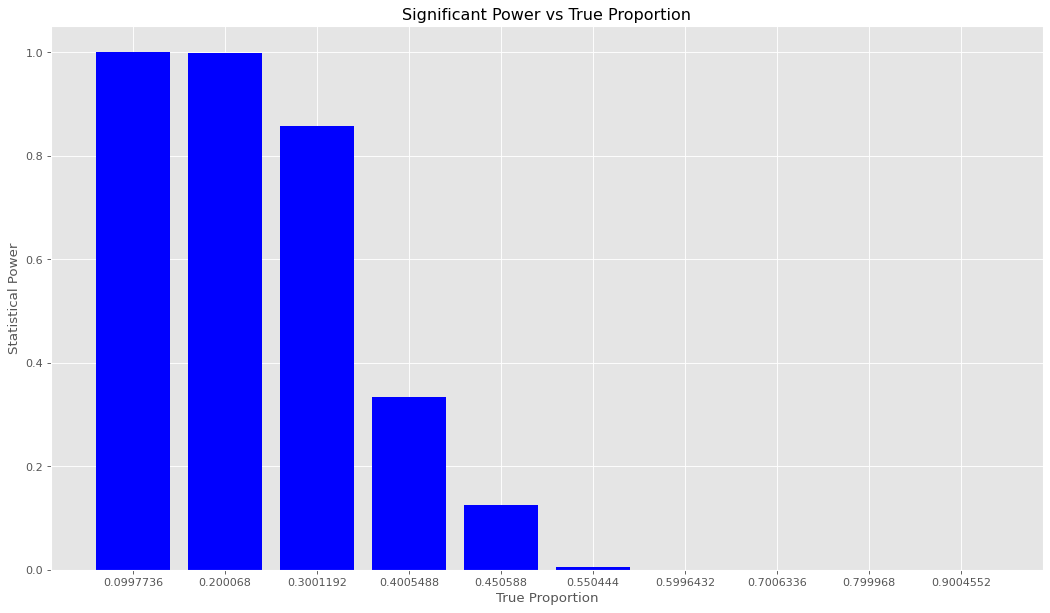

In [16]:
x = true_proportions
x_pos = [i for i, _ in enumerate(x)]

y = statistical_powers

figure(figsize=(16, 9), dpi=80)

plt.bar(x_pos, y, color='blue')
# plt.bar(x, y, color='blue')
plt.xlabel("True Proportion")
plt.ylabel("Statistical Power")
plt.title("Significant Power vs True Proportion")

plt.xticks(x_pos, x)

plt.show()

In [17]:
print('viii)')

N = 50 # number of trials
n = 25000 # number of simulations
p = 0
bias = 0.05
statistical_power = 1
required_statistical_power = 0.6

fair_observations = run_simulation(n, N, 0.5)
critical_value = int(np.percentile(fair_observations, 5))

while statistical_power > required_statistical_power:
    
    observations = run_simulation(n, N, p)

    count = 0
    for o in observations:
        if o < critical_value:
            count += 1

    statistical_power = count / n
    
    if statistical_power > required_statistical_power:
        p += bias
        print(f"statistical_power: {statistical_power} | p: {p}")

print(f"The minimum value of p required to obtain a statistical power of at least {required_statistical_power} is {round(p,2)} with a bias of {bias}.")

viii)
statistical_power: 1.0 | p: 0.05
statistical_power: 1.0 | p: 0.1
statistical_power: 1.0 | p: 0.15000000000000002
statistical_power: 0.99992 | p: 0.2
statistical_power: 0.99796 | p: 0.25
statistical_power: 0.97268 | p: 0.3
statistical_power: 0.85764 | p: 0.35
statistical_power: 0.6238 | p: 0.39999999999999997
The minimum value of p required to obtain a statistical power of at least 0.6 is 0.4 with a bias of 0.05.


In [18]:
# Grave Yard

In [19]:
# for observation in observations:
# #     print(observation)
#     p_value = stats.binom_test(observation, n=N, p=0.5, alternative='two-sided')
#     if p_value < significants_level:
#         print('Bias Coin')
#     else:
#         print('Fair Coin')



# for _ in range(n):
#     observation = []
#     for i in range(N):
#         observation.append(coin_flip(p))
#     observations.append(sum(observation))
    
#     p_value = stats.binom_test(observation.count(1), n=N, p=0.5, alternative='two-sided')
    
#     print(observation.count(1) / n)
#     print(p_value)
    
#     if p_value < significants_level:
#         print('Bias Coin')
#     else:
#         print('Fair Coin')
    
#     print(stats.binom_test(observation, n=n, p=0.5, alternative='two-sided'))

#     print("__________________")

In [20]:
for i in range(1,N+1):
    print(i)
    p_value = stats.binom_test(i, n=N, p=0.5, alternative='two-sided')
    if p_value < significants_level:
        print(f'{n}: Bias Coin')
    else:
        print(f'{n}: Fair Coin')

1
25000: Bias Coin
2
25000: Bias Coin
3
25000: Bias Coin
4
25000: Bias Coin
5
25000: Bias Coin
6
25000: Bias Coin
7
25000: Bias Coin
8
25000: Bias Coin
9
25000: Bias Coin
10
25000: Bias Coin
11
25000: Bias Coin
12
25000: Bias Coin
13
25000: Bias Coin
14
25000: Bias Coin
15
25000: Bias Coin
16
25000: Bias Coin
17
25000: Bias Coin
18
25000: Fair Coin
19
25000: Fair Coin
20
25000: Fair Coin
21
25000: Fair Coin
22
25000: Fair Coin
23
25000: Fair Coin
24
25000: Fair Coin
25
25000: Fair Coin
26
25000: Fair Coin
27
25000: Fair Coin
28
25000: Fair Coin
29
25000: Fair Coin
30
25000: Fair Coin
31
25000: Fair Coin
32
25000: Fair Coin
33
25000: Bias Coin
34
25000: Bias Coin
35
25000: Bias Coin
36
25000: Bias Coin
37
25000: Bias Coin
38
25000: Bias Coin
39
25000: Bias Coin
40
25000: Bias Coin
41
25000: Bias Coin
42
25000: Bias Coin
43
25000: Bias Coin
44
25000: Bias Coin
45
25000: Bias Coin
46
25000: Bias Coin
47
25000: Bias Coin
48
25000: Bias Coin
49
25000: Bias Coin
50
25000: Bias Coin


In [21]:
# sum(observations)
observations

[21,
 20,
 23,
 19,
 18,
 17,
 22,
 24,
 25,
 19,
 20,
 26,
 18,
 17,
 20,
 15,
 21,
 14,
 15,
 20,
 13,
 25,
 17,
 19,
 23,
 19,
 24,
 18,
 21,
 29,
 18,
 19,
 21,
 20,
 23,
 19,
 23,
 22,
 21,
 19,
 17,
 26,
 20,
 26,
 19,
 19,
 21,
 21,
 27,
 19,
 17,
 17,
 11,
 24,
 19,
 21,
 22,
 26,
 25,
 19,
 21,
 18,
 23,
 20,
 25,
 22,
 20,
 21,
 22,
 20,
 18,
 21,
 20,
 27,
 26,
 31,
 20,
 23,
 17,
 17,
 15,
 17,
 19,
 25,
 20,
 28,
 22,
 18,
 27,
 17,
 20,
 25,
 19,
 21,
 26,
 24,
 23,
 20,
 17,
 16,
 19,
 21,
 21,
 28,
 26,
 16,
 25,
 21,
 24,
 18,
 17,
 20,
 18,
 15,
 14,
 17,
 24,
 17,
 19,
 17,
 26,
 24,
 27,
 17,
 25,
 16,
 19,
 19,
 23,
 16,
 18,
 22,
 24,
 21,
 20,
 21,
 21,
 22,
 24,
 21,
 20,
 16,
 15,
 23,
 22,
 20,
 16,
 21,
 20,
 21,
 21,
 21,
 17,
 18,
 19,
 17,
 23,
 25,
 20,
 20,
 12,
 20,
 18,
 25,
 21,
 24,
 22,
 27,
 21,
 21,
 27,
 16,
 23,
 23,
 19,
 18,
 17,
 22,
 17,
 21,
 22,
 24,
 15,
 18,
 14,
 18,
 19,
 17,
 20,
 24,
 22,
 22,
 21,
 19,
 26,
 24,
 18,
 21,
 21,
 22,


In [22]:
print(np.percentile(observations, 5))
print(np.percentile(observations, 2.5))
print(np.percentile(observations, 97.5))

14.0
13.0
27.0


In [23]:
from scipy.stats import binom

x = observations #.count('Heads')
# # x = 12655
p = 0.5
n = N

# n, p = 5, 0.4
# mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
# x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
# x
prob = binom.cdf(x, n, p)
sum(prob)

4571.9730107337555